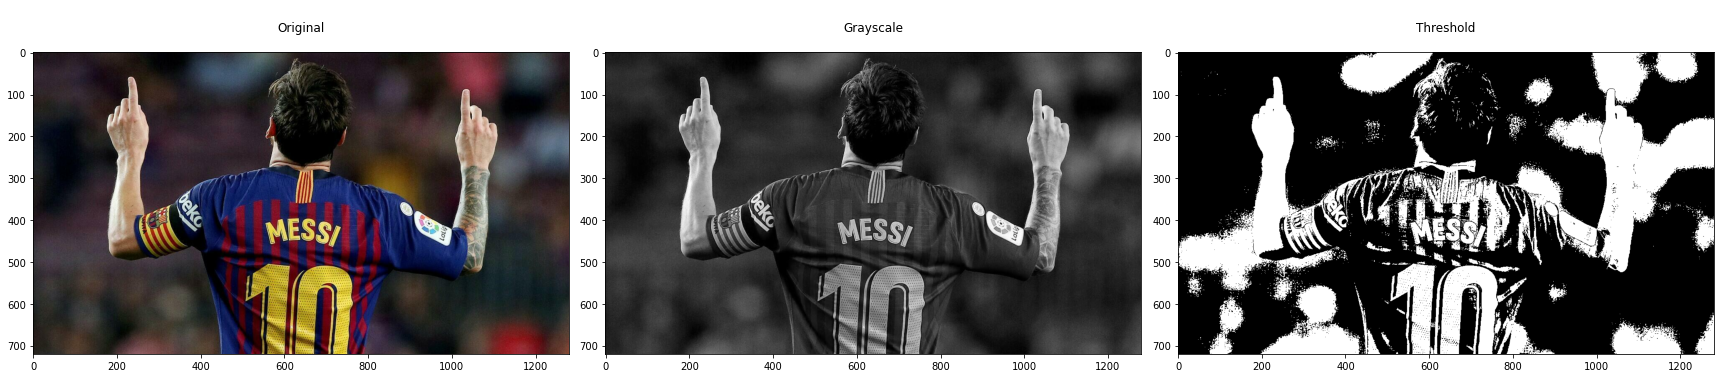

Wall time: 1.29 s


In [18]:
%%time
import numpy as np
from matplotlib import pyplot as plt

img = plt.imread( 'hd_01.jpg' )
# https://3.bp.blogspot.com/-eilZTdgbWPA/XFUltCS4Z1I/AAAAAAAABz0/feDxTa3Emtsb3Wx4xxu0hWnFrohqtwQfwCKgBGAs/w0/mountain-lake-scenery-nature-cottage-25-4K.jpg

img_color = img.copy()

# 회색조 변환
gray = np.sum( img*[1/3,1/3,1/3], axis=2 )
img = gray.copy()

# 평균값 구하기 
avg = np.average( img )

# 평균값 임계치 적용  

thresh = np.where( img < avg, 0 , 1 ) 

row_cnt = 1; col_cnt = 3;
fig, charts = plt.subplots( row_cnt, col_cnt, figsize=(8*col_cnt, 8*row_cnt) )
charts = charts.flatten() if row_cnt*col_cnt >= 2 else [ charts ]
idx = 0 

chart = charts[idx]
chart.imshow( img_color )
chart.set_title( '\nOriginal\n' )
idx += 1

chart = charts[idx]
chart.imshow( gray, cmap='gray' )
chart.set_title( '\nGrayscale\n' )
idx += 1

chart = charts[idx]
chart.imshow( thresh, cmap='gray' ) 
chart.set_title( '\nThreshold\n' )
idx += 1

plt.tight_layout(); plt.show()